In [2]:
!pip install xgboost



# Border Intrusion Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('border_intrusion_balanced_multiclass.csv')
df

,timestamp,sensor_id,latitude,longitude,motion_detected,sound_level_db,thermal_level,vibration_level,visibility,intrusion_type,intrusion
0,2025-01-01 00:00:00,39,33.224530,86.118587,0,75.028032,31.369229,1.944842,fog,normal,0
1,2025-01-01 00:01:00,29,27.727883,75.198329,0,86.592833,28.081850,8.523379,clear,vehicle,1
2,2025-01-01 00:02:00,15,31.619789,76.012411,1,95.038650,50.359514,13.794148,rain,human,1
3,2025-01-01 00:03:00,43,28.432171,83.223085,1,65.221198,35.529559,2.241390,rain,normal,0
4,2025-01-01 00:04:00,8,28.290558,83.911703,1,52.666239,62.824907,8.696841,rain,normal,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-01-07 22:35:00,26,28.980850,89.471591,1,63.471507,41.286399,9.294042,clear,normal,0
9996,2025-01-07 22:36:00,22,26.659005,72.335081,0,77.424876,61.847345,3.737189,rain,human,1
9997,2025-01-07 22:37:00,31,28.954404,79.732654,1,51.528886,33.579999,1.956064,clear,false_alarm,1
9998,2025-01-07 22:38:00,43,24.363196,78.169755,1,53.235092,26.370060,3.750401,night,normal,0


In [6]:
df.head()

,timestamp,sensor_id,latitude,longitude,motion_detected,sound_level_db,thermal_level,vibration_level,visibility,intrusion_type,intrusion
0,2025-01-01 00:00:00,39,33.224530,86.118587,0,75.028032,31.369229,1.944842,fog,normal,0
1,2025-01-01 00:01:00,29,27.727883,75.198329,0,86.592833,28.081850,8.523379,clear,vehicle,1
2,2025-01-01 00:02:00,15,31.619789,76.012411,1,95.038650,50.359514,13.794148,rain,human,1
3,2025-01-01 00:03:00,43,28.432171,83.223085,1,65.221198,35.529559,2.241390,rain,normal,0
4,2025-01-01 00:04:00,8,28.290558,83.911703,1,52.666239,62.824907,8.696841,rain,normal,0


In [7]:
df.tail()

,timestamp,sensor_id,latitude,longitude,motion_detected,sound_level_db,thermal_level,vibration_level,visibility,intrusion_type,intrusion
9995,2025-01-07 22:35:00,26,28.980850,89.471591,1,63.471507,41.286399,9.294042,clear,normal,0
9996,2025-01-07 22:36:00,22,26.659005,72.335081,0,77.424876,61.847345,3.737189,rain,human,1
9997,2025-01-07 22:37:00,31,28.954404,79.732654,1,51.528886,33.579999,1.956064,clear,false_alarm,1
9998,2025-01-07 22:38:00,43,24.363196,78.169755,1,53.235092,26.370060,3.750401,night,normal,0
9999,2025-01-07 22:39:00,10,30.731764,71.962532,1,61.994234,36.722938,3.240401,clear,normal,0


In [8]:
df.shape

(10000, 11)

In [9]:
df.isnull().sum()

timestamp          0
sensor_id          0
latitude           0
longitude          0
motion_detected    0
sound_level_db     0
thermal_level      0
vibration_level    0
visibility         0
intrusion_type     0
intrusion          0
dtype: int64

In [10]:
df['intrusion_type'].value_counts()

intrusion_type
normal         4039
human          1955
vehicle        1528
animal         1458
false_alarm    1020
Name: count, dtype: int64

In [11]:
le_visibility = LabelEncoder()
df['visibility_encoded'] = le_visibility.fit_transform(df['visibility'])

In [12]:
le_visibility

LabelEncoder()

In [13]:
le_intrusion_type = LabelEncoder()
df['intrusion_type_encoded'] = le_intrusion_type.fit_transform(df['intrusion_type'])
le_intrusion_type

LabelEncoder()

In [14]:
features = [
'sensor_id', 'latitude', 'longitude', 'motion_detected',
'sound_level_db', 'thermal_level', 'vibration_level',
'visibility_encoded'
]


X = df[features]
y_binary = df['intrusion']
y_multi = df['intrusion_type_encoded']

In [15]:
features

['sensor_id',
 'latitude',
 'longitude',
 'motion_detected',
 'sound_level_db',
 'thermal_level',
 'vibration_level',
 'visibility_encoded']

In [16]:
X

,sensor_id,latitude,longitude,motion_detected,sound_level_db,thermal_level,vibration_level,visibility_encoded
0,39,33.224530,86.118587,0,75.028032,31.369229,1.944842,1
1,29,27.727883,75.198329,0,86.592833,28.081850,8.523379,0
2,15,31.619789,76.012411,1,95.038650,50.359514,13.794148,3
3,43,28.432171,83.223085,1,65.221198,35.529559,2.241390,3
4,8,28.290558,83.911703,1,52.666239,62.824907,8.696841,3
...,...,...,...,...,...,...,...,...
9995,26,28.980850,89.471591,1,63.471507,41.286399,9.294042,0
9996,22,26.659005,72.335081,0,77.424876,61.847345,3.737189,3
9997,31,28.954404,79.732654,1,51.528886,33.579999,1.956064,0
9998,43,24.363196,78.169755,1,53.235092,26.370060,3.750401,2


In [17]:
y_binary

0       0
1       1
2       1
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: intrusion, Length: 10000, dtype: int64

In [18]:
y_multi

0       3
1       4
2       2
3       3
4       3
       ..
9995    3
9996    2
9997    1
9998    3
9999    3
Name: intrusion_type_encoded, Length: 10000, dtype: int32

In [19]:
X_train, X_test, yb_train, yb_test = train_test_split(
X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)


Xm_train, Xm_test, ym_train, ym_test = train_test_split(
X, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

In [20]:
X_train, yb_test

(      sensor_id   latitude  longitude  motion_detected  sound_level_db  \
 1938         13  22.344972  82.955115                0       52.524109   
 7155         16  22.545701  88.616648                1      101.915226   
 7435          1  23.856720  78.451253                1       68.439021   
 791          48  24.534151  81.927597                0       40.918765   
 8629         21  22.274160  78.590909                1      106.932936   
 ...         ...        ...        ...              ...             ...   
 4429         35  25.092934  78.936825                0       73.335634   
 8174         45  31.683390  79.114641                0       70.507637   
 9071          5  34.079005  75.483783                0       79.928128   
 1359         37  23.289806  79.342462                1       44.178890   
 9135         38  24.827413  78.887672                1       68.148477   
 
       thermal_level  vibration_level  visibility_encoded  
 1938      41.119946         7.789773 

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Xm_train_scaled = scaler.fit_transform(Xm_train)
Xm_test_scaled = scaler.transform(Xm_test)

In [22]:
scaler

StandardScaler()

In [23]:
X_test_scaled

array([[ 0.50498432, -0.55534305,  1.1677866 , ...,  0.89030841,
         0.21679326, -0.95203977],
       [-0.05117538,  0.69324707, -1.39701408, ...,  2.06334616,
        -0.51799225,  1.7376547 ],
       [ 0.36594439,  0.22869548,  1.4816762 , ..., -0.48842686,
         0.65987443,  0.84108988],
       ...,
       [-1.51109459, -1.29126   ,  0.54643214, ..., -0.80676749,
         0.80513561, -0.95203977],
       [ 0.01834458, -0.51183238,  0.61876089, ..., -0.72117178,
         0.42804142,  0.84108988],
       [ 0.85258413, -0.46163861,  0.10575482, ..., -0.30471748,
        -0.20516213, -0.05547495]])

In [24]:
Xm_train_scaled

array([[-1.50141262, -1.53819891,  0.44558539, ..., -0.74442941,
        -0.42896452, -0.9463665 ],
       [-1.22279764,  0.14025558, -1.18075229, ..., -0.19314293,
         1.29881558,  0.8459943 ],
       [ 1.56335222, -1.04223821, -0.94113075, ...,  0.88342834,
         1.39880191, -0.9463665 ],
       ...,
       [ 0.72750726, -0.743534  , -1.7708658 , ..., -0.75522334,
         1.84647855,  0.8459943 ],
       [-1.64072012, -0.52313271, -1.43015023, ...,  0.34937391,
         0.06497239,  0.8459943 ],
       [ 1.21508349,  0.77579752, -0.65794321, ..., -0.55751692,
         0.11431432,  0.8459943 ]])

In [25]:
Xm_test_scaled

array([[ 1.14542974,  1.30235278, -0.2933748 , ...,  0.76620485,
         1.99237609, -0.0501861 ],
       [ 0.51854602, -0.18448108, -0.34123272, ..., -0.67885149,
         0.0256276 ,  0.8459943 ],
       [ 1.42404473, -0.96490191,  1.32059331, ...,  0.45619376,
        -0.83468087, -0.9463665 ],
       ...,
       [ 0.51854602, -1.65649818, -1.21331937, ..., -0.3433451 ,
        -0.67310172,  0.8459943 ],
       [ 1.56335222,  0.21990701, -0.18440564, ...,  0.64532582,
        -0.41680485, -0.0501861 ],
       [-1.08349015, -1.63338648, -0.98068939, ...,  0.90127086,
        -0.54849894, -0.9463665 ]])

In [26]:
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train_scaled, yb_train)


binary_preds = binary_model.predict(X_test_scaled)


print("\nBinary Classification Report:\n")
print(classification_report(yb_test, binary_preds))


Binary Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       808
           1       0.78      0.81      0.80      1192

    accuracy                           0.75      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.75      0.75      2000



In [27]:
multi_model = RandomForestClassifier(
n_estimators=200,
random_state=42,
class_weight='balanced'
)


multi_model.fit(Xm_train, ym_train)
multi_preds = multi_model.predict(Xm_test)


print("\nMulti-Class Classification Report:\n")
print(classification_report(ym_test, multi_preds, target_names=le_intrusion_type.classes_))


Multi-Class Classification Report:

              precision    recall  f1-score   support

      animal       0.41      0.12      0.19       291
 false_alarm       0.00      0.00      0.00       204
       human       0.55      0.59      0.57       391
      normal       0.61      0.90      0.73       808
     vehicle       0.74      0.69      0.72       306

    accuracy                           0.60      2000
   macro avg       0.46      0.46      0.44      2000
weighted avg       0.53      0.60      0.54      2000



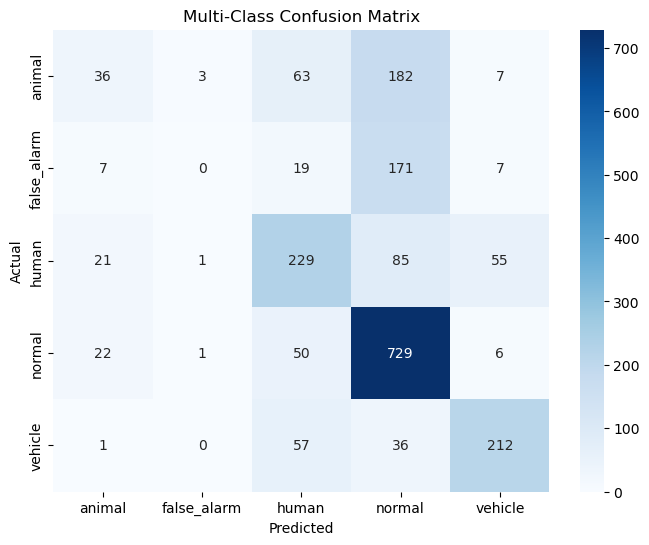

In [28]:
cm = confusion_matrix(ym_test, multi_preds)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=le_intrusion_type.classes_,
yticklabels=le_intrusion_type.classes_)
plt.title('Multi-Class Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

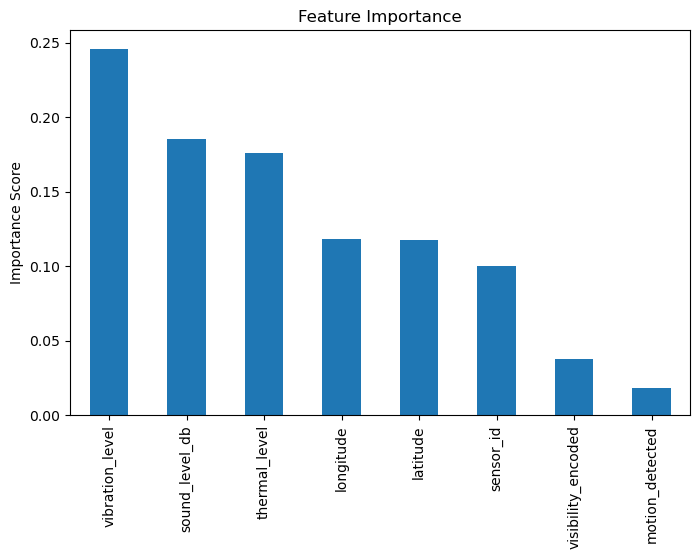

In [29]:
importances = multi_model.feature_importances_


feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)


plt.figure(figsize=(8, 5))
feat_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=len(le_intrusion_type.classes_),
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(Xm_train, ym_train)
xgb_preds = xgb_model.predict(Xm_test)

print("\nXGBoost Multi-Class Classification Report:\n")
print(classification_report(ym_test, xgb_preds, target_names=le_intrusion_type.classes_))



XGBoost Multi-Class Classification Report:

              precision    recall  f1-score   support

      animal       0.34      0.14      0.20       291
 false_alarm       0.22      0.04      0.07       204
       human       0.50      0.58      0.54       391
      normal       0.62      0.85      0.72       808
     vehicle       0.73      0.65      0.69       306

    accuracy                           0.58      2000
   macro avg       0.48      0.45      0.44      2000
weighted avg       0.53      0.58      0.54      2000



In [31]:
binary_probs = binary_model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(yb_test, binary_probs)
print(f"Binary ROC-AUC Score: {roc_auc:.4f}")

Binary ROC-AUC Score: 0.8339


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=3,
    scoring='f1_weighted'
)

grid.fit(Xm_train, ym_train)

print("\nBest Random Forest Parameters:", grid.best_params_)



Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [35]:
from sklearn.metrics import precision_recall_curve

probs = multi_model.predict_proba(Xm_test)
probs

array([[0.015, 0.005, 0.39 , 0.   , 0.59 ],
       [0.13 , 0.19 , 0.045, 0.59 , 0.045],
       [0.265, 0.07 , 0.245, 0.385, 0.035],
       ...,
       [0.26 , 0.115, 0.045, 0.58 , 0.   ],
       [0.345, 0.07 , 0.185, 0.395, 0.005],
       [0.205, 0.03 , 0.08 , 0.685, 0.   ]])

In [36]:
conf_mat = confusion_matrix(ym_test, multi_preds)
pd.DataFrame(
    conf_mat,
    index=le_intrusion_type.classes_,
    columns=le_intrusion_type.classes_
)


,animal,false_alarm,human,normal,vehicle
animal,36,3,63,182,7
false_alarm,7,0,19,171,7
human,21,1,229,85,55
normal,22,1,50,729,6
vehicle,1,0,57,36,212


In [37]:
import joblib

joblib.dump(multi_model, "intrusion_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']